In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [18]:
%matplotlib inline

In [2]:
train = pd.read_csv("breast-cancer-diagnostic.shuf.lrn.csv")

In [3]:
train.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765
1,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061
2,901315,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000
3,9112367,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
4,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.3583,0.15150,0.2463,0.07738


In [4]:
train.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.024415e+07,13.857832,19.310000,90.076070,625.102105,0.095960,0.101917,0.084848,0.046362,0.180695,...,15.823884,25.665825,104.135123,823.488421,0.132186,0.249617,0.265468,0.112228,0.290091,0.083933
std,1.295562e+08,3.252277,4.277718,22.227367,310.526144,0.013481,0.048350,0.073680,0.034868,0.028748,...,4.361540,6.128468,29.847173,482.465945,0.022661,0.151791,0.201241,0.063620,0.067542,0.018766
min,8.670000e+03,7.729000,9.710000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.106000,...,8.952000,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.711490e+05,11.570000,16.170000,74.200000,409.100000,0.086370,0.064920,0.030460,0.021680,0.161900,...,12.840000,21.190000,83.850000,505.600000,0.117200,0.146000,0.116800,0.063430,0.247700,0.072070
50%,9.055020e+05,13.150000,18.910000,84.450000,536.900000,0.095940,0.092180,0.059280,0.032640,0.177800,...,14.670000,25.440000,96.310000,657.000000,0.130300,0.211900,0.210200,0.099100,0.280400,0.079440
75%,8.711561e+06,15.490000,21.800000,102.500000,748.900000,0.104600,0.129600,0.120400,0.065760,0.195300,...,18.070000,30.360000,121.200000,989.500000,0.146100,0.341600,0.382900,0.156100,0.316800,0.091870
max,9.113205e+08,27.220000,33.810000,182.100000,2250.000000,0.142500,0.283900,0.410800,0.187800,0.304000,...,33.120000,45.410000,220.800000,3216.000000,0.222600,1.058000,1.105000,0.273300,0.663800,0.207500


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
ID                         285 non-null int64
class                      285 non-null object
radiusMean                 285 non-null float64
 textureMean               285 non-null float64
 perimeterMean             285 non-null float64
 areaMean                  285 non-null float64
 smoothnessMean            285 non-null float64
 compactnessMean           285 non-null float64
 concavityMean             285 non-null float64
 concavePointsMean         285 non-null float64
 symmetryMean              285 non-null float64
 fractalDimensionMean      285 non-null float64
 radiusStdErr              285 non-null float64
 textureStdErr             285 non-null float64
 perimeterStdErr           285 non-null float64
 areaStdErr                285 non-null float64
 smoothnessStdErr          285 non-null float64
 compactnessStdErr         285 non-null float64
 concavityStdErr           285 non

In [7]:
train.isnull().mean()

ID                         0.0
class                      0.0
radiusMean                 0.0
 textureMean               0.0
 perimeterMean             0.0
 areaMean                  0.0
 smoothnessMean            0.0
 compactnessMean           0.0
 concavityMean             0.0
 concavePointsMean         0.0
 symmetryMean              0.0
 fractalDimensionMean      0.0
 radiusStdErr              0.0
 textureStdErr             0.0
 perimeterStdErr           0.0
 areaStdErr                0.0
 smoothnessStdErr          0.0
 compactnessStdErr         0.0
 concavityStdErr           0.0
 concavePointsStdErr       0.0
 symmetryStdErr            0.0
 fractalDimensionStdErr    0.0
 radiusWorst               0.0
 textureWorst              0.0
 perimeterWorst            0.0
 areaWorst                 0.0
 smoothnessWorst           0.0
 compactnessWorst          0.0
 concavityWorst            0.0
 concavePointsWorst        0.0
 symmetryWorst             0.0
 fractalDimensionWorst     0.0
dtype: f

In [9]:
train.drop(['ID'], axis=1, inplace=True)

In [11]:
train.head()

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765
1,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061
2,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000
3,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
4,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,...,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.3583,0.15150,0.2463,0.07738


B    189
M     96
Name: class, dtype: int64


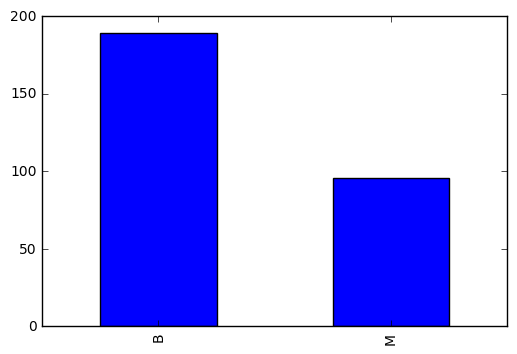

In [22]:
train['class'].value_counts().plot.bar()
print(train['class'].value_counts())

------------

### Data visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

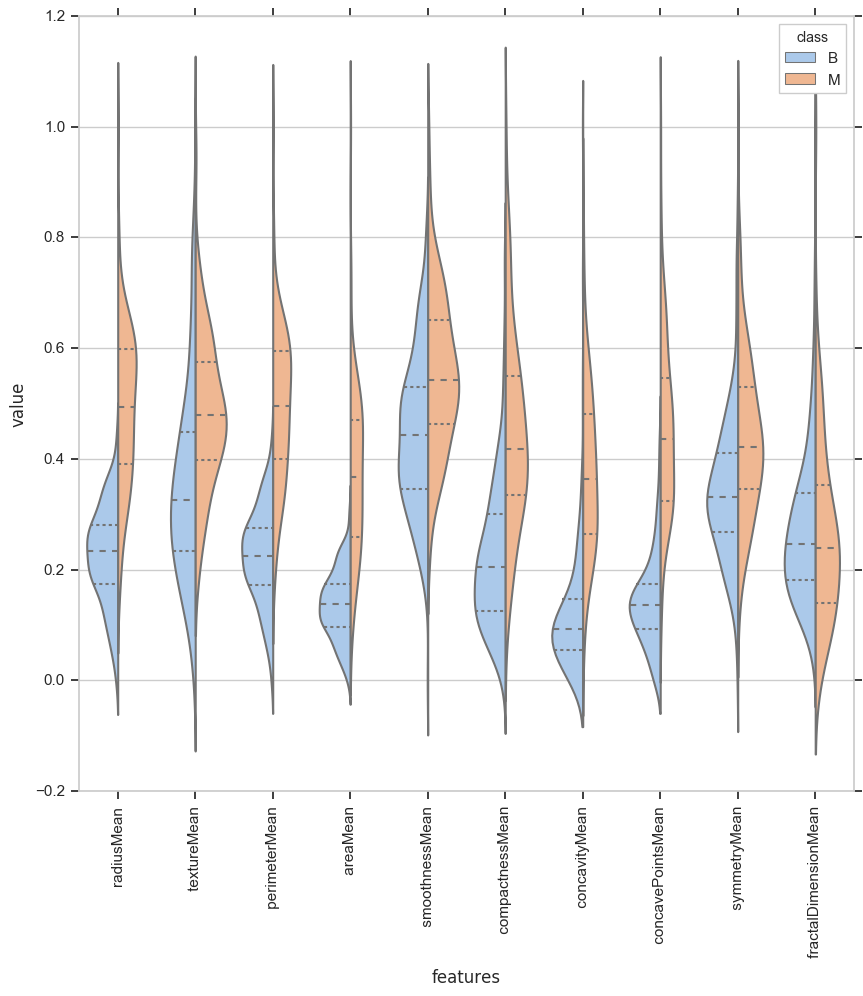

In [83]:
#select features and object
y = train["class"]
X = train.drop(["class"], axis=1)

#normalize data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = X.columns

#concat together
data = pd.concat([y, df_normalized.iloc[:,:10]], axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

##plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

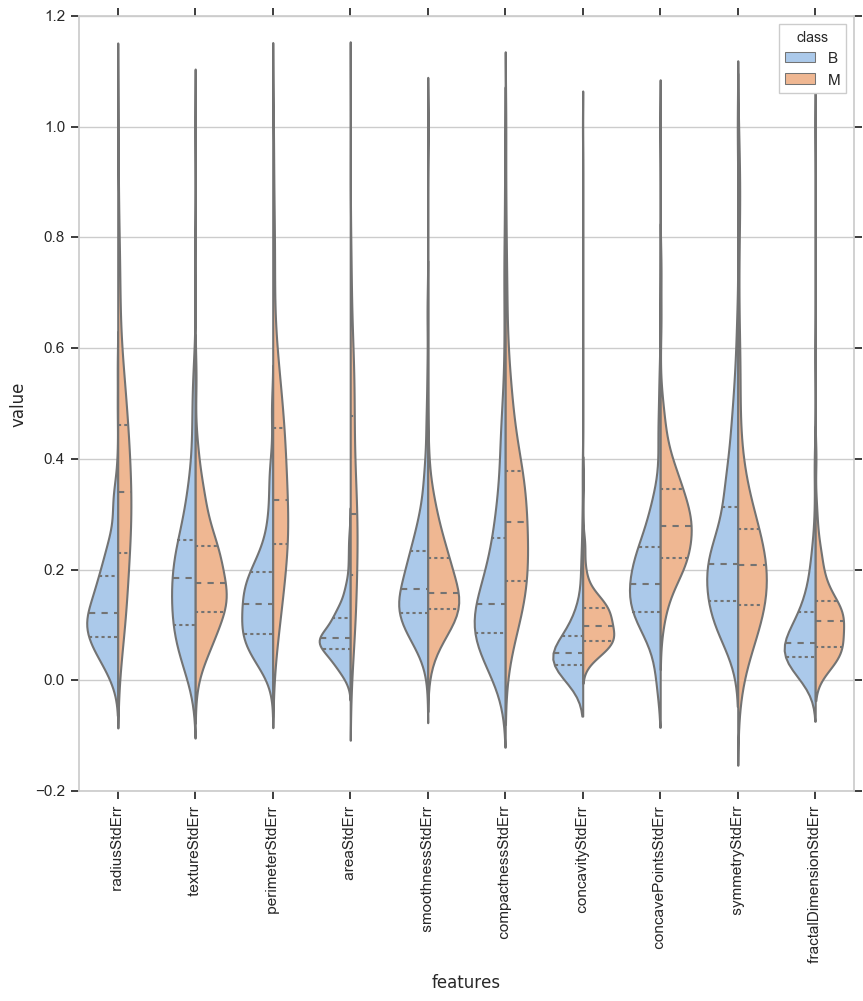

In [84]:

#concat together
data = pd.concat([y, df_normalized.iloc[:,10:20]], axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

##plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

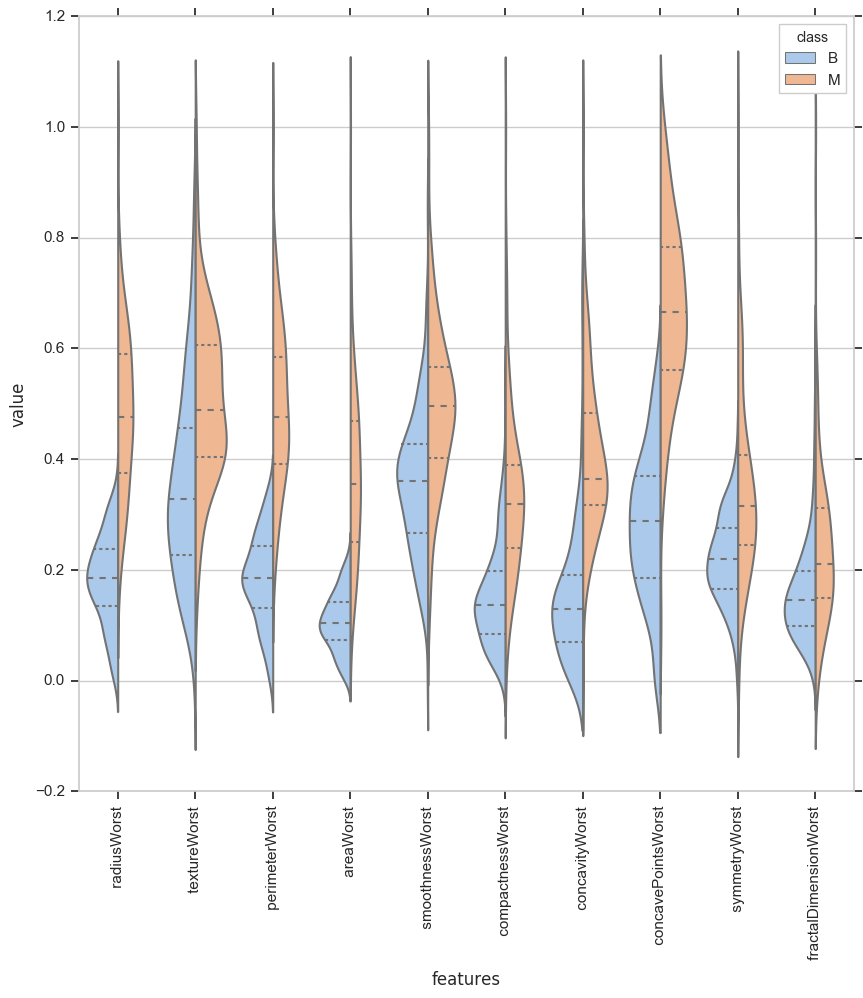

In [85]:
#concat together
data = pd.concat([y, df_normalized.iloc[:,20:]], axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

##plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

--------------

### Calculate correlation between columns

In [113]:
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[' perimeterMean', ' areaMean', ' perimeterStdErr', ' areaStdErr', ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst', ' concavePointsWorst']


In [90]:
train.columns

Index(['class', 'radiusMean', ' textureMean', ' perimeterMean', ' areaMean',
       ' smoothnessMean', ' compactnessMean', ' concavityMean',
       ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean',
       ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr',
       ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr',
       ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst',
       ' smoothnessWorst', ' compactnessWorst', ' concavityWorst',
       ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst'],
      dtype='object')

In [104]:
more_to_drop = [' smoothnessStdErr', ' symmetryStdErr', ' fractalDimensionMean', ' textureStdErr']
for m in more_to_drop:
    to_drop.append(m)

In [154]:
train.columns

Index(['class', 'radiusMean', ' textureMean', ' perimeterMean', ' areaMean',
       ' smoothnessMean', ' compactnessMean', ' concavityMean',
       ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean',
       ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr',
       ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr',
       ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst',
       ' smoothnessWorst', ' compactnessWorst', ' concavityWorst',
       ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst'],
      dtype='object')

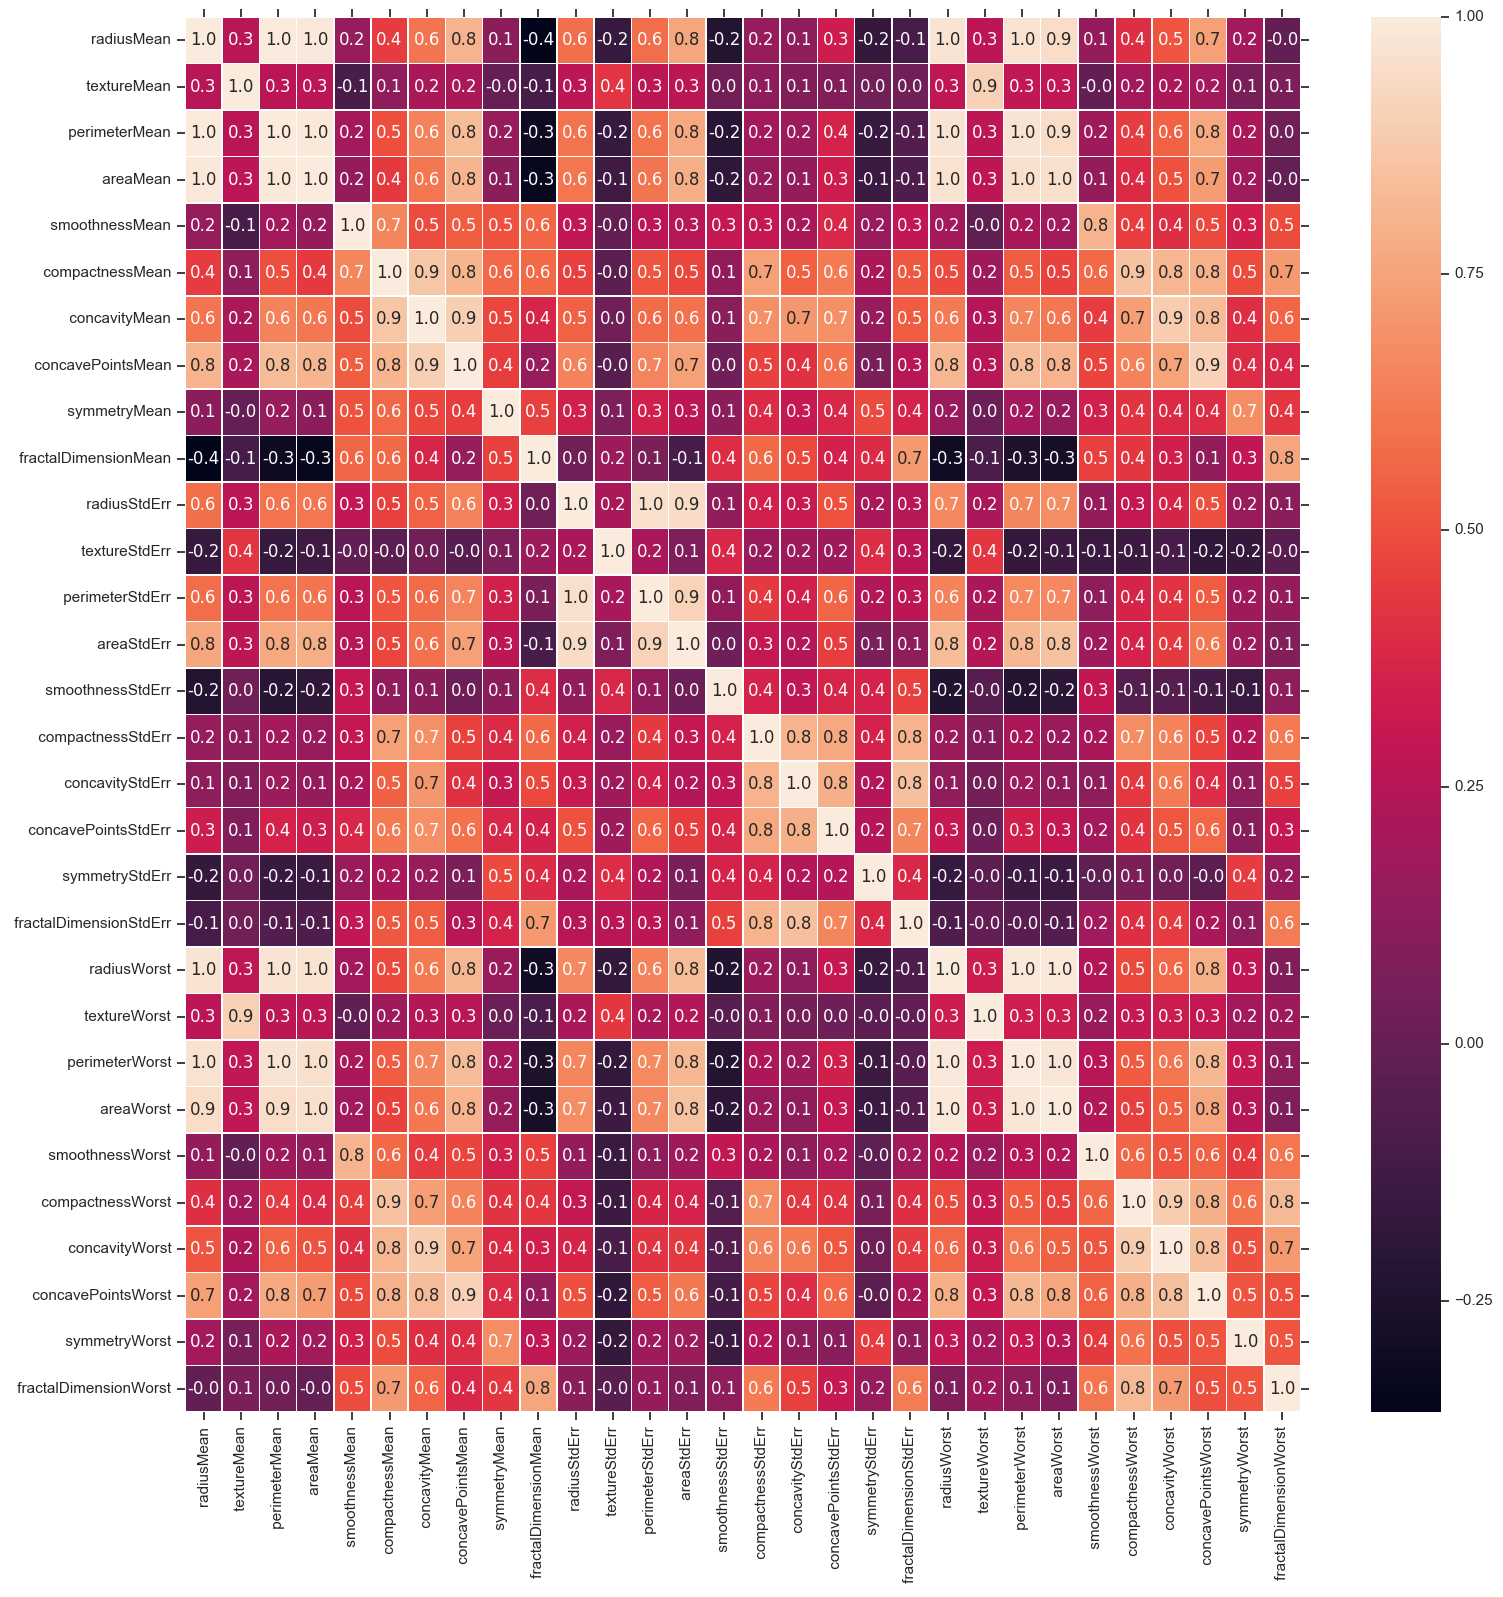

In [88]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text xticklabel objects>)

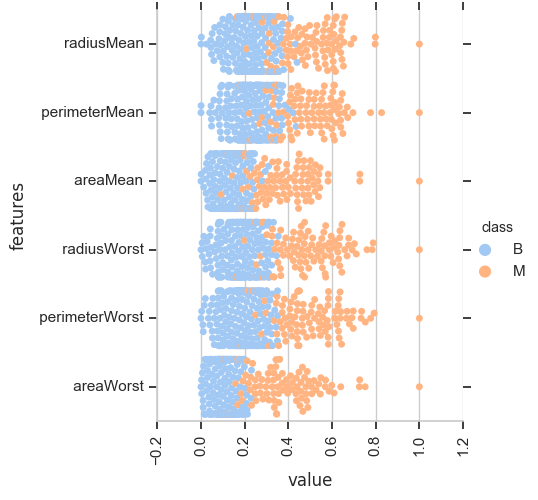

In [160]:
#select features and object
y = train["class"]
to_check = train[['radiusMean', ' perimeterMean', ' areaMean', ' radiusWorst', ' perimeterWorst', ' areaWorst']]

#normalize data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled_to_check = min_max_scaler.fit_transform(to_check)
df_normalized_to_check = pd.DataFrame(np_scaled_to_check)
df_normalized_to_check.columns = to_check.columns

#concat together
data = pd.concat([y, df_normalized_to_check], axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

##plot
plt.figure(figsize=(20,20))
sns.catplot(x="value", y="features", hue="class", kind="swarm", data=data)
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text xticklabel objects>)

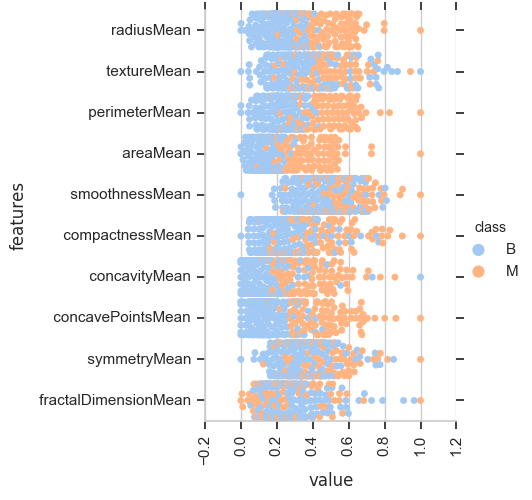

In [153]:
data = pd.concat([y, df_normalized.iloc[:,:10]], axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,20))
sns.catplot(x="value", y="features", hue="class", kind="swarm", data=data)
plt.xticks(rotation=90)

In [105]:
to_drop

[' perimeterMean',
 ' areaMean',
 ' perimeterStdErr',
 ' areaStdErr',
 ' radiusWorst',
 ' textureWorst',
 ' perimeterWorst',
 ' areaWorst',
 ' concavePointsWorst',
 ' smoothnessStdErr',
 ' symmetryStdErr',
 ' fractalDimensionMean',
 ' textureStdErr']

In [106]:
X_1 = X.drop(to_drop, axis=1)

In [114]:
X_2 = X.drop(to_drop, axis=1)

In [115]:
X_2.columns

Index(['radiusMean', ' textureMean', ' smoothnessMean', ' compactnessMean',
       ' concavityMean', ' concavePointsMean', ' symmetryMean',
       ' fractalDimensionMean', ' radiusStdErr', ' textureStdErr',
       ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr',
       ' smoothnessWorst', ' compactnessWorst', ' concavityWorst',
       ' symmetryWorst', ' fractalDimensionWorst'],
      dtype='object')

Accuracy is:  0.93023255814


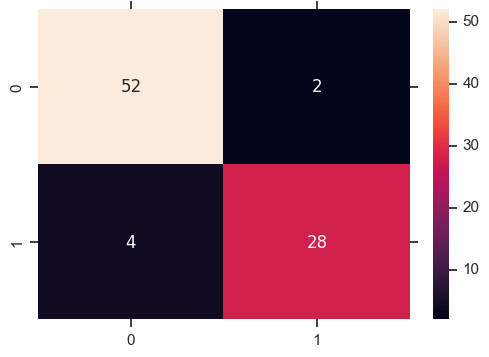

In [138]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [140]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  8.09275559e+01   2.35796458e+01   6.02997518e-02   1.75735769e+00
   6.13029160e+00   3.36698154e+00   1.67817056e-01   8.87148539e+00
   2.03463188e-01   2.83932143e-01   8.73918640e-02   3.27319039e-03
   1.39389642e-01   6.72626519e+00   1.30826905e+01   8.12774384e-01
   1.07592511e-01]
Feature list: Index(['radiusMean', ' textureMean', ' smoothnessMean', ' compactnessMean',
       ' concavityMean', ' concavePointsMean', ' symmetryMean',
       ' radiusStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' fractalDimensionStdErr', ' smoothnessWorst',
       ' compactnessWorst', ' concavityWorst', ' symmetryWorst',
       ' fractalDimensionWorst'],
      dtype='object')


Accuracy is:  0.96511627907


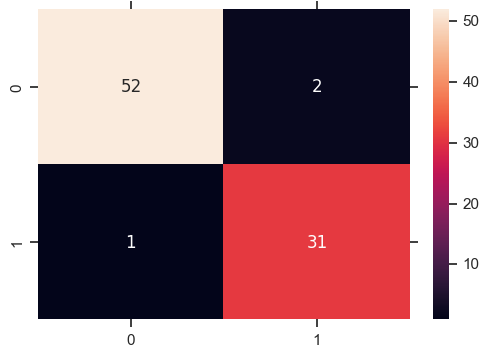

In [141]:
x_train = select_feature.transform(x_train)
x_test = select_feature.transform(x_test)


#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(n_estimators=5)      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)


ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test))
sns.heatmap(cm_2,annot=True,fmt="d")